# 作业1：Numpy练习

本次作业主要对Python中的矩阵运算库Numpy进行练习。如遇到不清楚的函数或主题，可以查阅[官方文档](https://numpy.org/doc/stable/user/index.html)或利用搜索引擎寻求帮助。

### 基础知识

本节对Numpy进行简要介绍，没有实际的题目，可直接运行每一个单元格。

首先导入Numpy包：

In [1]:
import numpy as np

利用Numpy可以方便地创建向量和矩阵：

In [ ]:
vec = np.array([1.0, 2.0, 5.0])
print(vec)

In [ ]:
mat = np.array([[1.0, 2.0, 2.0], [3.0, 5.0, 4.5]])
print(mat)

In [ ]:
vec = np.linspace(start=1.0, stop=5.0, num=12)
print(vec)

In [ ]:
mat = np.reshape(vec, (3, 4))
print(mat)

Python中下标是从0开始的，请一定要记住这一点，否则会造成很多逻辑错误。

In [ ]:
print(vec[0])
print(vec[2])
print(mat[1, 1])

负数的下标表示从尾部往前数：

In [ ]:
print(vec[-1])
print(vec[-2])
print(mat[1, -1])

可以用冒号选取向量中的一段范围，格式为`x[start:end]`，选出的元素包含`x[start]`，不包含`x[end]`。

In [ ]:
print(vec[1:3])

In [ ]:
print(mat[:, :2])

在编写函数时，经常需要各种测试数据，此时可以用Numpy来生成各类随机数。在需要用到随机数之前，一定要先设置随机数种子，以使结果可重复。

In [ ]:
np.random.seed(123)

生成均匀分布随机数：

In [ ]:
unif = np.random.uniform(low=0.0, high=1.0, size=5)
print(unif)

正态分布随机数：

In [2]:
norm = np.random.normal(loc=0.0, scale=1.0, size=(2, 5))
print(norm)

[[-0.20840796  0.24201955 -0.73034406  1.25353682  2.97462376]
 [-1.10460694  0.09184777  1.25427137 -0.80901974 -0.88977512]]


Numpy提供了许多数学函数对向量和矩阵进行操作：

In [3]:
print(np.exp(norm))

[[ 0.81187576  1.2738191   0.48174321  3.50270951 19.58225415]
 [ 0.33134109  1.09619794  3.5052834   0.44529436  0.41074811]]


In [ ]:
print(np.log(unif))

也可以对向量和矩阵进行汇总：

In [ ]:
np.sum(unif)

In [ ]:
np.mean(norm)

汇总可以按行或者按列进行，这由`axis`参数决定。0表示运算时第一个维度（行）在变化，1表示运算时第二个维度（列）在变化。
再次提醒，Python中以0表示第一个元素！

In [ ]:
np.mean(norm, axis=0)  # 对第一个维度（行标在变化）求均值

In [ ]:
np.var(norm, axis=1)  # 对第二个维度（列标在变化）求方差

### 第1题

(a) 生成10000个服从(0, 1)间均匀分布的随机数，赋值给变量`x`，并打印其**前10个**元素。

In [8]:
x = np.random.uniform(low = 0,high = 1,size = 10000)
print(x[:10])

[0.96599807 0.44721995 0.14152253 0.96959692 0.33730172 0.86069968
 0.32831365 0.59067137 0.86701667 0.94181172]


(b) 创建向量`y`，令其在数学上等于`y=-log(x)`，其中`log`为自然对数。打印`y`的**最后10个**元素。

In [9]:
y = -1*np.log(x)
print(y[-10:])

[0.18088694 0.31908451 0.30627416 0.39289673 1.06872175 3.60127186
 1.19418572 3.74446088 2.61552467 0.52117701]


(c) 查找在Python中绘制图形的方法，绘制`y`的直方图。

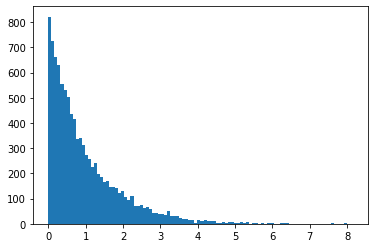

In [13]:
import matplotlib.pyplot as plt
bins = 100
plt.hist(y,bins=bins)
plt.show()

(d) 猜测或证明`y`服从什么分布，并简要说明理由。

- y服从参数为1的指数分布
$$y-Exp(1)$$

### 第2题

(a) 考虑Sigmoid函数 $$\sigma(x)=\frac{e^x}{1+e^x}$$

请在Python中编写一个函数`sigmoid(x)`，令其可以接收一个向量`x`，返回Sigmoid函数在`x`上的取值。

In [25]:
def sigmoid(x):
    l = len(x)
    res = []
    for i in range(l):
        if x[i] >= 0:
            res.append(1.0/1+np.exp(-x[i]))
        else:
            res.append(np.exp(x[i])/(1+np.exp(x[i])))
    return np.array(res)

array([0.00000000e+00, 3.72007598e-44, 4.53978687e-05, 2.00000000e+00,
       1.00004540e+00, 1.00000000e+00, 1.00000000e+00])

(b) 创建向量`x`，使其包含元素-1000, -100, -10, 0, 10, 100, 1000。在`x`上调用上面编写的函数，返回的结果是什么？是否出现警告或错误？

In [26]:
x = np.array([-1000,-100,-10,0,10,100,1000])
sigmoid(x)

array([0.00000000e+00, 3.72007598e-44, 4.53978687e-05, 2.00000000e+00,
       1.00004540e+00, 1.00000000e+00, 1.00000000e+00])

(c) 如果出现警告或错误，思考可能的原因是什么。（提示：Sigmoid函数真实的取值范围是多少？分子和分母的取值范围又是什么？是否可以对Sigmoid函数的表达式进行某种等价变换？）如果一切正常，可忽略此问题。

(d) 请再次尝试编写`sigmoid(x)`函数，使其在给定的数据上顺利计算结果。可在网上搜索相关主题寻求帮助，但需给出来源。如果之前一切正常，可忽略此问题。

### 第3题

(a) 考虑Softplus函数 $$\mathrm{softplus}(x)=\log(1+e^x)$$

请在Python中编写一个函数`softplus(x)`，令其可以接收一个向量`x`，返回Softplus函数在`x`上的取值。

In [30]:
def softplus(x):
    l,res = len(x),[]
    for i in range(l):
        if x[i] >= 0:
            res.append(x[i]+np.log(np.exp(-x[i])+1))
        else:
            res.append(np.log(1+np.exp(x[i])))
    return np.array(res)

(b) 创建向量`x`，使其包含元素-1000, -100, -10, 0, 10, 100, 1000。在`x`上调用上面编写的函数，返回的结果是什么？是否出现警告或错误？

In [32]:
softplus(x)

array([0.00000000e+00, 0.00000000e+00, 4.53988992e-05, 6.93147181e-01,
       1.00000454e+01, 1.00000000e+02, 1.00000000e+03])

(c) 如果出现警告或错误，参照第2题的方法，思考可能的原因是什么。如果一切正常，可忽略此问题。

(d) 请再次尝试编写`softplus(x)`函数，使其在给定的数据上顺利计算结果。可在网上搜索相关主题寻求帮助，但需给出来源。如果之前一切正常，可忽略此问题。